# TAREA 4. Limpeza de Datos e Implementación de NN para Clasificación
> **Mauricio Montanares**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#cargamos la data
dataset = pd.read_csv('Heladas-checkpoint.csv')

# Analisis del Dataset 

##### Tamaño 

In [5]:
dataset.shape

(7213, 28)

> 156 filas, 9 columnas

## Primera vista al contenido del Dataset

In [6]:
info=dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213 entries, 0 to 7212
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dias                 1000 non-null   object 
 1   temperatura MAX      1000 non-null   float64
 2   Temperatura Media    1000 non-null   float64
 3   precipitacion        1000 non-null   float64
 4   humedad              1000 non-null   object 
 5   presion              1000 non-null   object 
 6   horas de frio        1000 non-null   float64
 7   mes                  1000 non-null   float64
 8   temeperatura minima  1000 non-null   float64
 9   Unnamed: 9           1000 non-null   float64
 10  Unnamed: 10          0 non-null      float64
 11  Unnamed: 11          0 non-null      float64
 12  Unnamed: 12          0 non-null      float64
 13  Unnamed: 13          0 non-null      float64
 14  Unnamed: 14          0 non-null      float64
 15  Unnamed: 15          0 non-null      f

> Notamos que existen columnas con diferentes tipos de datos, numericos como no numericos.

> Algunas columnas presentan elementos nulos.

In [5]:
#descripcion de las columnas con datos del tipo numerico (float64, int64)
dataset.describe()

,Species_No,Petal_width,Petal_length,Comp1,Sepal_width,Sepal_length,Comp2.1,Comp3
count,156.000000,146.000000,155.000000,152.000000,155.000000,155.000000,152.000000,155.000000
mean,2.012821,1.227397,3.856774,4.069737,3.036129,5.667742,5.646711,11.569484
std,0.819025,0.896470,2.302935,2.320825,0.757721,1.562878,1.571009,6.041595
min,1.000000,0.000000,0.000000,0.200000,0.000000,-5.000000,-5.000000,0.000000
25%,1.000000,0.300000,1.550000,1.775000,2.800000,5.100000,5.100000,6.120000
50%,2.000000,1.300000,4.300000,4.550000,3.000000,5.700000,5.700000,12.180000
75%,3.000000,1.800000,5.100000,5.300000,3.350000,6.400000,6.400000,15.745000
max,3.000000,5.600000,20.500000,20.700000,8.700000,10.200000,10.200000,32.860000


In [6]:
#visualizacion de los primeros elementos del dataset
dataset.head()

,Species_No,Petal_width,Comp2,Petal_length,Comp1,Sepal_width,Sepal_length,Comp2.1,Comp3,Species_name,Obs
0,1,0.2,0.14,1.4,1.6,3.5,5.1,5.1,5.60,Setosa,James
1,1,0.2,0.14,1.4,1.6,3.0,4.9,4.9,4.80,Setosa,James
2,1,NaN,0.14,1.3,1.5,3.2,4.7,4.7,4.80,Setosa,James
3,1,NaN,0.14,1.5,1.7,3.1,4.6,4.6,5.27,Setosa,James
4,1,NaN,0.14,1.4,NaN,3.6,5.0,5.0,0.00,Setosa,Peter


> Notamos que la columa 'Comp2' contiene informacion numerica pero almacenada como str. Debemos convertir estos datos.

> Sepal_length y Comp2.1 se ven sospechosamente similares, al menos en head. Lo analizaremos en detalle mas adelante.

> Eliminamos la columna Comp2.1 por no aportar informacion relevante a la ya existente.

> Visualzando los rangos maximos y minimos podemos notar que es necesario ajustar a la misma escala todas las caracteristicas (Numericas)

In [51]:
#importamos MinMaxScaler
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [52]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(num_data)
scaled_df = pd.DataFrame(scaled_df, columns=['Species_No', 'Petal_width', 'Petal_length', 'Comp1', 'Sepal_width',
       'Sepal_length', 'Comp2', 'Comp3'])

In [53]:
scaled_df

,Species_No,Petal_width,Petal_length,Comp1,Sepal_width,Sepal_length,Comp2,Comp3
0,0.0,0.045455,0.070175,0.070175,0.736842,0.242424,0.739130,0.110246
1,0.0,0.045455,0.070175,0.070175,0.473684,0.181818,0.956522,0.058366
2,0.0,0.793780,0.052632,0.052632,0.578947,0.121212,0.782609,0.058366
3,0.0,0.793780,0.087719,0.087719,0.526316,0.090909,0.956522,0.088846
4,0.0,0.793780,0.070175,0.761299,0.789474,0.212121,0.484149,0.497372
...,...,...,...,...,...,...,...,...
146,1.0,1.000000,0.736842,0.736842,0.473684,0.727273,0.043478,0.797665
147,1.0,0.818182,0.701754,0.701754,0.210526,0.606061,0.043478,0.590143
148,1.0,0.863636,0.736842,0.736842,0.473684,0.666667,0.043478,0.797665
149,1.0,1.000000,0.771930,0.771930,0.684211,0.575758,0.776583,0.981842


In [54]:
print("Minimos:")
print(scaled_df.min())
print('')
print("=============================")
print('')
print("Maximos:")
scaled_df.max()

Minimos:
Species_No      0.0
Petal_width     0.0
Petal_length    0.0
Comp1           0.0
Sepal_width     0.0
Sepal_length    0.0
Comp2           0.0
Comp3           0.0
dtype: float64


Maximos:


Species_No      1.0
Petal_width     1.0
Petal_length    1.0
Comp1           1.0
Sepal_width     1.0
Sepal_length    1.0
Comp2           1.0
Comp3           1.0
dtype: float64

> **Datos Normalizados**

# CORRELACION

In [55]:
import seaborn as sn

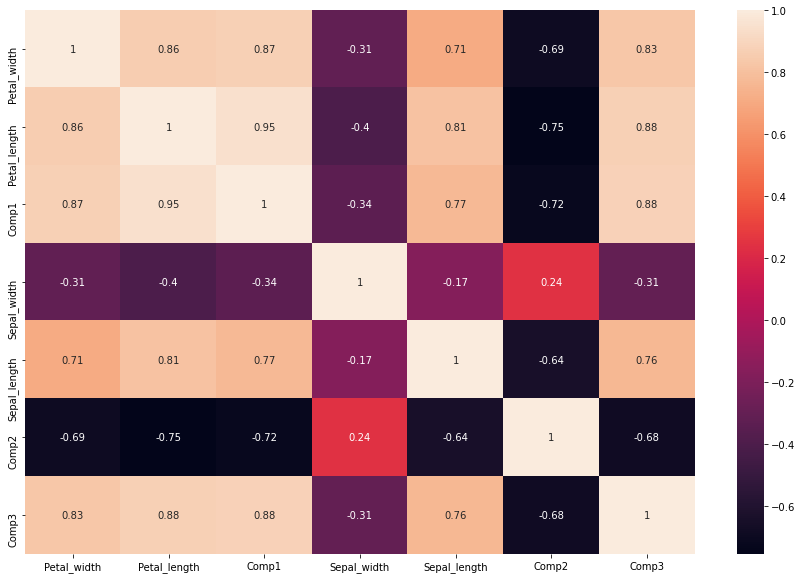

In [56]:
#create corrmatrix
plt.figure(figsize=(15, 10))
corr_matrix = scaled_df.drop('Species_No', axis='columns').corr()

sn.heatmap(corr_matrix , annot=True)
#plt.savefig("corr_matrix.eps")
plt.show()

> Notamos que existe una correlacion total entre las columnas 'Comp1' y 'Petal_length'. Podemos eliminar una de estas dos.

> Exise tamien una correlacion muy alta(>90%) entre 'Comp1'-'Petal_width'

> Se descartaran las columnas 'Comp1'

In [57]:
scaled_df.drop(['Comp1'], axis='columns', inplace=True)

In [58]:
scaled_df

,Species_No,Petal_width,Petal_length,Sepal_width,Sepal_length,Comp2,Comp3
0,0.0,0.045455,0.070175,0.736842,0.242424,0.739130,0.110246
1,0.0,0.045455,0.070175,0.473684,0.181818,0.956522,0.058366
2,0.0,0.793780,0.052632,0.578947,0.121212,0.782609,0.058366
3,0.0,0.793780,0.087719,0.526316,0.090909,0.956522,0.088846
4,0.0,0.793780,0.070175,0.789474,0.212121,0.484149,0.497372
...,...,...,...,...,...,...,...
146,1.0,1.000000,0.736842,0.473684,0.727273,0.043478,0.797665
147,1.0,0.818182,0.701754,0.210526,0.606061,0.043478,0.590143
148,1.0,0.863636,0.736842,0.473684,0.666667,0.043478,0.797665
149,1.0,1.000000,0.771930,0.684211,0.575758,0.776583,0.981842


In [59]:
for x in range(scaled_df.shape[0]):
    
    if scaled_df.iloc[x,0] == 0.0:
        scaled_df.iloc[x,0] = int(0);
        
    if scaled_df.iloc[x,0] == 0.5:
        scaled_df.iloc[x,0] = 2;
    if scaled_df.iloc[x,0] == 1.0:
        scaled_df.iloc[x,0] = 3;

> 1 -> Setosa

> 2 -> Versicolor

> 3 -> Verginica

**Estos seran nuestros targets en el proceso de clasificación**

In [60]:
scaled_df

,Species_No,Petal_width,Petal_length,Sepal_width,Sepal_length,Comp2,Comp3
0,0.0,0.045455,0.070175,0.736842,0.242424,0.739130,0.110246
1,0.0,0.045455,0.070175,0.473684,0.181818,0.956522,0.058366
2,0.0,0.793780,0.052632,0.578947,0.121212,0.782609,0.058366
3,0.0,0.793780,0.087719,0.526316,0.090909,0.956522,0.088846
4,0.0,0.793780,0.070175,0.789474,0.212121,0.484149,0.497372
...,...,...,...,...,...,...,...
146,3.0,1.000000,0.736842,0.473684,0.727273,0.043478,0.797665
147,3.0,0.818182,0.701754,0.210526,0.606061,0.043478,0.590143
148,3.0,0.863636,0.736842,0.473684,0.666667,0.043478,0.797665
149,3.0,1.000000,0.771930,0.684211,0.575758,0.776583,0.981842


# Guardamos el nuevo Dataset

In [61]:
new_df = scaled_df

In [62]:
new_df.to_excel('new_df.xlsx')

# Trabajamos con Este nuevo Dataset

In [63]:
dataset = new_df

In [64]:
dataset

,Species_No,Petal_width,Petal_length,Sepal_width,Sepal_length,Comp2,Comp3
0,0.0,0.045455,0.070175,0.736842,0.242424,0.739130,0.110246
1,0.0,0.045455,0.070175,0.473684,0.181818,0.956522,0.058366
2,0.0,0.793780,0.052632,0.578947,0.121212,0.782609,0.058366
3,0.0,0.793780,0.087719,0.526316,0.090909,0.956522,0.088846
4,0.0,0.793780,0.070175,0.789474,0.212121,0.484149,0.497372
...,...,...,...,...,...,...,...
146,3.0,1.000000,0.736842,0.473684,0.727273,0.043478,0.797665
147,3.0,0.818182,0.701754,0.210526,0.606061,0.043478,0.590143
148,3.0,0.863636,0.736842,0.473684,0.666667,0.043478,0.797665
149,3.0,1.000000,0.771930,0.684211,0.575758,0.776583,0.981842


In [101]:
dataset['Species_name'] = species_names ##add target feature

In [102]:
dataset['Species_name'][103] = ' Verginica'
dataset['Species_name'][104] = ' Verginica'
dataset['Species_name'][105] = ' Verginica'
dataset['Species_name'][106] = ' Verginica'
dataset['Species_name'][150] = ' Verginica'

<ipython-input-102-7baf67c5b23c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Species_name'][103] = ' Verginica'
<ipython-input-102-7baf67c5b23c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Species_name'][104] = ' Verginica'
<ipython-input-102-7baf67c5b23c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Species_name'][105] = ' Verginica'
<ipython-input-102-7baf67c5b23c>:4: SettingWithCopyWarning: 


# Implemenación Support Vector Machines

Steps: 

> Seperate features and target

> Create the network

> Fit model

> Test model

In [67]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelBinarizer
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [104]:
X = dataset.drop(['Species_No', 'Species_name'], axis=1) #drop target row 
y = dataset['Species_name']  #select target row (terget)

In [105]:
#el traget es de tipo STRING, debemos codificarla
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
y = np_utils.to_categorical(encoded_y)

In [106]:
from sklearn.model_selection import train_test_split
#make split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #80% de la data para train | 20% de la data para test

## Creamos el modelo

In [108]:

# Creating a model
model = Sequential()
model.add(Dense(10, input_dim=6, activation='relu'))   # input_dim = 6 ya que tenemos 6 caracteristicas 
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))    # la densidad de la salida es 3 porque tenemos 3 clases que podemos clasificar

# Compiling model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [109]:
model.fit(X_train, y_train, epochs=300, batch_size=10)  #entrenamos el modelo

Epoch 1/300
12/12 [==============================] - 0s 625us/step - loss: 1.2185 - accuracy: 0.0605
Epoch 2/300
12/12 [==============================] - 0s 563us/step - loss: 1.2193 - accuracy: 0.1013
Epoch 3/300
12/12 [==============================] - 0s 571us/step - loss: 1.1535 - accuracy: 0.3438
Epoch 4/300
12/12 [==============================] - 0s 597us/step - loss: 1.1246 - accuracy: 0.3786
Epoch 5/300
12/12 [==============================] - 0s 787us/step - loss: 1.1306 - accuracy: 0.2872
Epoch 6/300
12/12 [==============================] - 0s 828us/step - loss: 1.0826 - accuracy: 0.3660
Epoch 7/300
12/12 [==============================] - 0s 1ms/step - loss: 1.0672 - accuracy: 0.3219
Epoch 8/300
12/12 [==============================] - 0s 1ms/step - loss: 1.0597 - accuracy: 0.3383
Epoch 9/300
12/12 [==============================] - 0s 1ms/step - loss: 1.0391 - accuracy: 0.4023
Epoch 10/300
12/12 [==============================] - 0s 1ms/step - loss: 1.0278 - accuracy: 0.43

# Metricas de desempeño

In [117]:
accuracy = model.evaluate(X_train, y_train)
print("\nAccuracy: %.2f%%" % (accuracy[1]*100))

4/4 [==============================] - 0s 2ms/step - loss: 0.0888 - accuracy: 0.9583

Accuracy: 95.83%


In [118]:
scores = model.evaluate(X_test, y_test)
print("\nAccuracy: %.2f%%" % (scores[1]*100))

1/1 [==============================] - 0s 18ms/step - loss: 0.0822 - accuracy: 0.9677

Accuracy: 96.77%
